<a href="https://colab.research.google.com/github/ferhat00/LLM/blob/main/Portfolio%20Performance%20Comparison%20and%20Weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


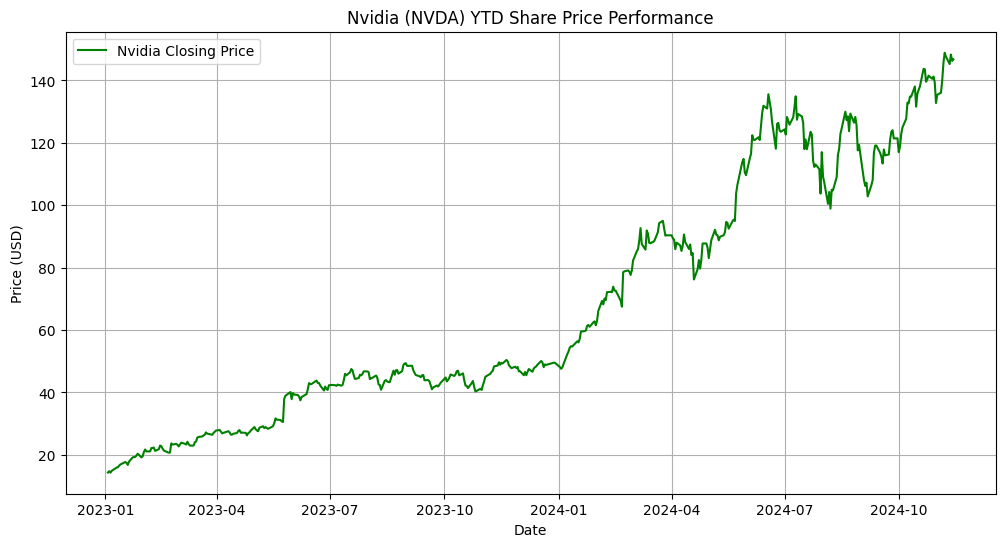

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Define the ticker symbol
ticker_symbol = 'NVDA'

# Define the start date (beginning of the year) and end date (today)
start_date = '2023-01-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Fetch the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Nvidia Closing Price', color='green')
plt.title('Nvidia (NVDA) YTD Share Price Performance')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  5 of 5 completed
<ipython-input-3-abddb1bcbfca>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")
[*********************100%***********************]  5 of 5 completed
<ipython-input-3-abddb1bcbfca>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


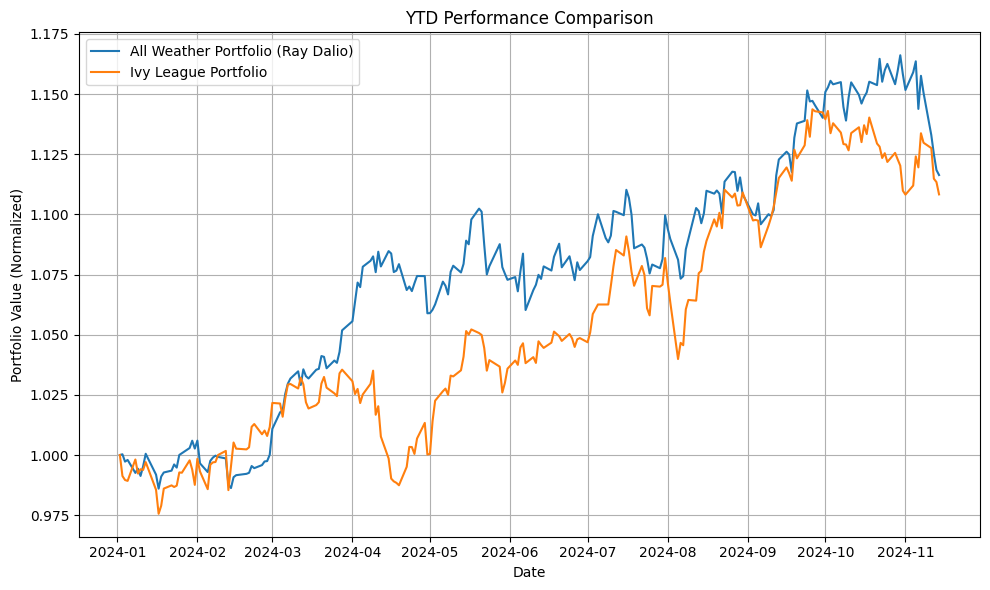

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def compare_ytd_performance():
    # Define the ETF allocations for the portfolios
    all_weather = {
        "VTI": 0.3,  # US Total Stock Market
        "TLT": 0.4,  # Long-Term Treasury Bonds
        "IEI": 0.15, # Intermediate Treasury Bonds
        "GLD": 0.075, # Gold
        "DBC": 0.075 # Commodities
    }

    ivy_league = {
        "VTI": 0.2,   # US Total Stock Market
        "VEA": 0.2,   # Developed Markets
        "VWO": 0.2,   # Emerging Markets
        "BND": 0.2,   # Total Bond Market
        "VNQ": 0.2    # Real Estate
    }

    # Function to fetch data and calculate returns
    def get_ytd_returns(portfolio):
        today = datetime.today()
        start_date = f"{today.year}-01-01"
        end_date = today.strftime("%Y-%m-%d")

        data = yf.download(list(portfolio.keys()), start=start_date, end=end_date)["Adj Close"]
        data = data.fillna(method="ffill")

        # Normalize data and calculate portfolio performance
        returns = (data / data.iloc[0])  # Normalize to 1
        weighted_returns = returns * list(portfolio.values())
        portfolio_returns = weighted_returns.sum(axis=1)
        return portfolio_returns

    # Get YTD performance for each portfolio
    all_weather_returns = get_ytd_returns(all_weather)
    ivy_league_returns = get_ytd_returns(ivy_league)

    # Plot the performance
    plt.figure(figsize=(10, 6))
    plt.plot(all_weather_returns, label="All Weather Portfolio (Ray Dalio)")
    plt.plot(ivy_league_returns, label="Ivy League Portfolio")
    plt.title("YTD Performance Comparison")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value (Normalized)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Call the function
compare_ytd_performance()

[*********************100%***********************]  10 of 10 completed


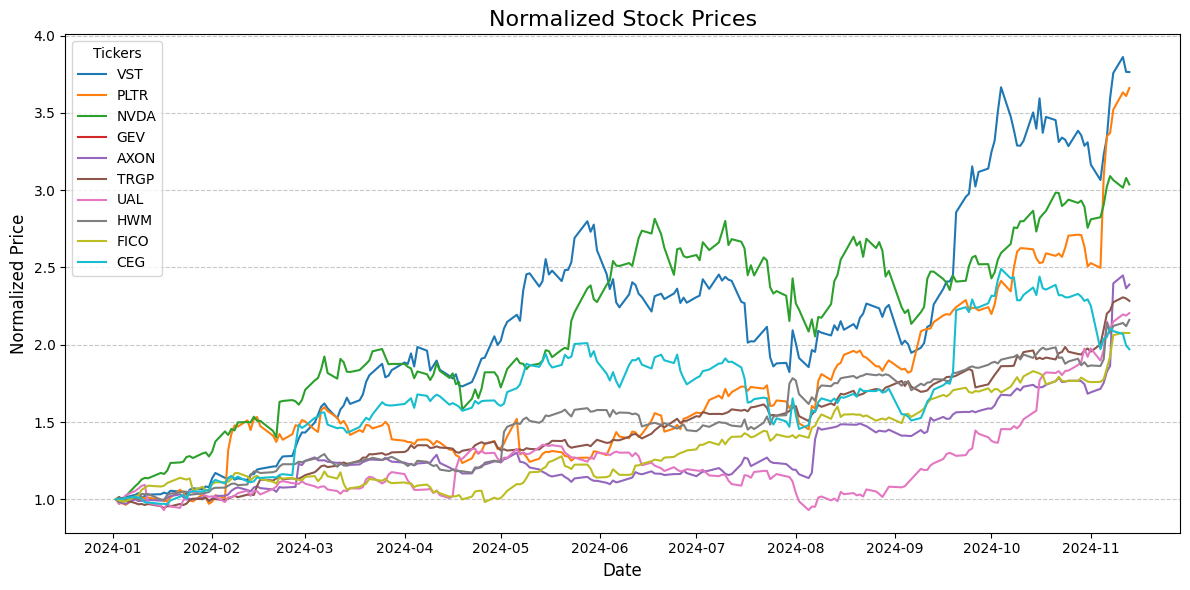

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def plot_normalized_prices(tickers, start_date, end_date):
    """
    Plots normalized daily closing prices for the given stock tickers.

    Parameters:
        tickers (list): List of stock ticker symbols.
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.
    """
    # Download stock data using yfinance
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

    # Normalize prices (divide by the first value of each stock)
    normalized_data = data / data.iloc[0]

    # Plotting
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    plt.title('Normalized Stock Prices', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Normalized Price', fontsize=12)
    plt.legend(title='Tickers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
tickers = ["VST", "PLTR", "NVDA", "GEV", "AXON", "TRGP", "UAL", "HWM", "FICO", "CEG"]
start_date = "2024-01-01"
end_date = "2024-11-14"
plot_normalized_prices(tickers, start_date, end_date)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


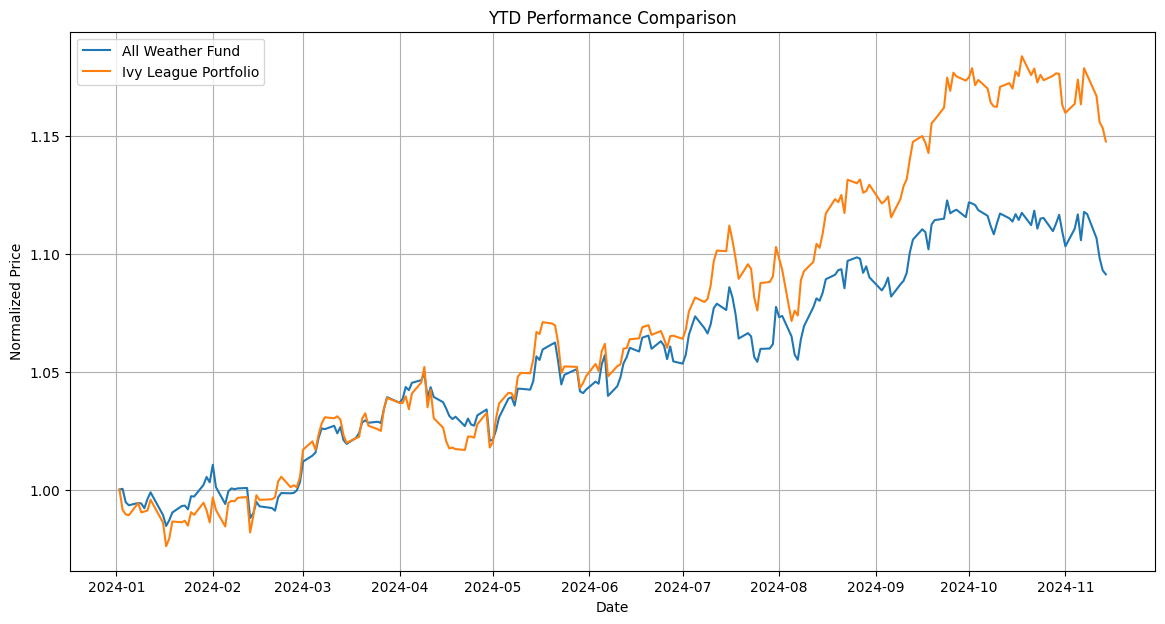

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def compare_ytd_performance():
    # Define ETF tickers for Ray Dalio's All Weather Fund and Ivy League Portfolio
    all_weather_etfs = ['VTI', 'TLT', 'IEF', 'GLD', 'DBC']
    ivy_league_etfs = ['SPY', 'AGG', 'GLD', 'VNQ', 'VWO']  # Example ETFs for Ivy League Portfolio

    # Download data for the current year
    start_date = '2024-01-01'
    end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
    all_weather_data = yf.download(all_weather_etfs, start=start_date, end=end_date)['Adj Close']
    ivy_league_data = yf.download(ivy_league_etfs, start=start_date, end=end_date)['Adj Close']

    # Calculate normalized returns
    all_weather_returns = all_weather_data / all_weather_data.iloc[0]
    ivy_league_returns = ivy_league_data / ivy_league_data.iloc[0]

    # Plot the performance
    plt.figure(figsize=(14, 7))
    plt.plot(all_weather_returns.mean(axis=1), label='All Weather Fund')
    plt.plot(ivy_league_returns.mean(axis=1), label='Ivy League Portfolio')
    plt.title('YTD Performance Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_ytd_performance()
